# Exploratory Data Analysis

## Load Libs

In [1]:
import os

# data
import pandas as pd
import numpy as np 

# plotting
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objs as go

# stats
import scipy.stats as stats
from scipy.stats import expon, norm, kstest
from scipy.stats import chisquare

## Load data

In [2]:
df_flu = pd.read_excel("./data/Data_Flu.xlsx")
df_rsv = pd.read_excel("./data/Data_RSV.xlsx")
df_sars = pd.read_excel("./data/Data_SARCoV.xlsx")

In [3]:
df_flu.head()

,yyyy-w (Flu),FluA-Nat,FluB-Nat,Mov-FluA-Nat,Mov-FluB-Nat,FluA-BEG,FluB-BEG,Mov-FluA-BEG,Mov-FluB-BEG,FluA-BET,...,SAMPLES-BLE,SAMPLES-MER,SAMPLES-UEB,SAMPLES-ECH,SAMPLES-BOE,SAMPLES-GRE,SAMPLES-HES,SAMPLES-VIE,SAMPLES-WIL,SITUATION-Nat
0,2021_40,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,...,36.0,35.0,36.0,36.0,NaN,NaN,NaN,NaN,NaN,Low
1,2021_41,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021_42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021_43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021_44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_flu.columns

Index(['yyyy-w (Flu)', 'FluA-Nat', 'FluB-Nat', 'Mov-FluA-Nat', 'Mov-FluB-Nat',
       'FluA-BEG', 'FluB-BEG', 'Mov-FluA-BEG', 'Mov-FluB-BEG', 'FluA-BET',
       'FluB-BET', 'Mov-FluA-BET', 'Mov-FluB-BET', 'FluA-PET', 'FluB-PET',
       'Mov-FluA-PET', 'Mov-FluB-PET', 'FluA-SCH', 'FluB-SCH', 'Mov-FluA-SCH',
       'Mov-FluB-SCH', 'FluA-BLE', 'FluB-BLE', 'Mov-FluA-BLE', 'Mov-FluB-BLE',
       'FluA-MER', 'FluB-MER', 'Mov-FluA-MER', 'Mov-FluB-MER', 'FluA-UEB',
       'FluB-UEB', 'Mov-FluA-UEB', 'Mov-FluB-UEB', 'FluA-ECH', 'FluB-ECH',
       'Mov-FluA-ECH', 'Mov-FluB-ECH', 'FluA-BOE', 'FluB-BOE', 'Mov-FluA-BOE',
       'Mov-FluB-BOE', 'FluA-GRE', 'FluB-GRE', 'Mov-FluA-GRE', 'Mov-FluB-GRE',
       'FluA-HES', 'FluB-HES', 'Mov-FluA-HES', 'Mov-FluB-HES', 'FluA-VIE',
       'FluB-VIE', 'Mov-FluA-VIE', 'Mov-FluB-VIE', 'FluA-WIL', 'FluB-WIL',
       'Mov-FluA-WIL', 'Mov-FluB-WIL', 'SAMPLES-Nat', 'SAMPLES-BEG',
       'SAMPLES-BET', 'SAMPLES-PET', 'SAMPLES-SCH', 'SAMPLES-BLE',
       'SAMPLES-MER

## Plot Data

C:\Users\adhav\AppData\Local\Temp\ipykernel_23260\3667450956.py:15: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  f.legend("A", "B")


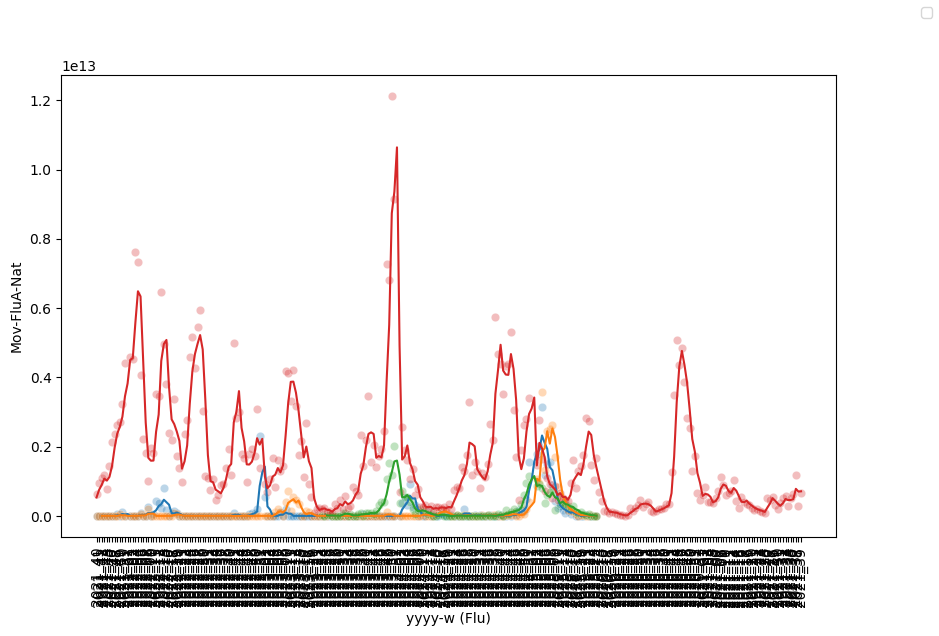

In [5]:
f, ax = plt.subplots(figsize=(10, 6))

sns.lineplot(data = df_flu, x = 'yyyy-w (Flu)', y = 'Mov-FluA-Nat')
sns.scatterplot(data = df_flu, x = 'yyyy-w (Flu)', y = 'FluA-Nat', alpha = 0.3, sizes = 0.1)

sns.lineplot(data = df_flu, x = 'yyyy-w (Flu)', y = 'Mov-FluB-Nat')
sns.scatterplot(data = df_flu, x = 'yyyy-w (Flu)', y = 'FluB-Nat', alpha = 0.3, sizes = 0.1)

sns.lineplot(data = df_rsv, x = 'yyyy-w (RSV)', y = 'Mov-RSV-Nat')
sns.scatterplot(data = df_rsv, x = 'yyyy-w (RSV)', y = 'RSV-Nat', alpha = 0.3, sizes = 0.1)

sns.lineplot(data = df_sars, x = 'yyyy-w (SARS-CoV)', y = 'Mov-SARS-CoV-Nat')
sns.scatterplot(data = df_sars, x = 'yyyy-w (SARS-CoV)', y = 'SARS-CoV-Nat', alpha = 0.3, sizes = 0.1)

f.legend("A", "B")
ax.tick_params(axis = 'x', rotation = 90)

## plot national all

In [6]:
fig = make_subplots()

# FluA
fig.add_trace(go.Scatter(
    x=df_flu['yyyy-w (Flu)'], y=df_flu['Mov-FluA-Nat'],
    mode='lines', name='Mov-FluA-Nat'
))
fig.add_trace(go.Scatter(
    x=df_flu['yyyy-w (Flu)'], y=df_flu['FluA-Nat'],
    mode='markers', name='FluA-Nat', opacity=0.3, marker=dict(size=4)
))

# FluB
fig.add_trace(go.Scatter(
    x=df_flu['yyyy-w (Flu)'], y=df_flu['Mov-FluB-Nat'],
    mode='lines', name='Mov-FluB-Nat'
))
fig.add_trace(go.Scatter(
    x=df_flu['yyyy-w (Flu)'], y=df_flu['FluB-Nat'],
    mode='markers', name='FluB-Nat', opacity=0.3, marker=dict(size=4)
))

# RSV
fig.add_trace(go.Scatter(
    x=df_rsv['yyyy-w (RSV)'], y=df_rsv['Mov-RSV-Nat'],
    mode='lines', name='Mov-RSV-Nat'
))
fig.add_trace(go.Scatter(
    x=df_rsv['yyyy-w (RSV)'], y=df_rsv['RSV-Nat'],
    mode='markers', name='RSV-Nat', opacity=0.3, marker=dict(size=4)
))

# SARS-CoV
fig.add_trace(go.Scatter(
    x=df_sars['yyyy-w (SARS-CoV)'], y=df_sars['Mov-SARS-CoV-Nat'],
    mode='lines', name='Mov-SARS-CoV-Nat'
))
fig.add_trace(go.Scatter(
    x=df_sars['yyyy-w (SARS-CoV)'], y=df_sars['SARS-CoV-Nat'],
    mode='markers', name='SARS-CoV-Nat', opacity=0.3, marker=dict(size=4)
))

fig.update_layout(
    width=1000, height=600,
    xaxis_title='Week',
    yaxis_title='RNA Copies',
    legend_title='Legend'
)
fig.update_xaxes(tickangle=90)
fig.show()

## Plot Flu all

'yyyy-w (Flu)', 'FluA-Nat', 'FluB-Nat', 'Mov-FluA-Nat', 'Mov-FluB-Nat',
       'FluA-BEG', 'FluB-BEG', 'Mov-FluA-BEG', 'Mov-FluB-BEG', 'FluA-BET',
       'FluB-BET', 'Mov-FluA-BET', 'Mov-FluB-BET', 'FluA-PET', 'FluB-PET',
       'Mov-FluA-PET', 'Mov-FluB-PET', 'FluA-SCH', 'FluB-SCH', 'Mov-FluA-SCH',
       'Mov-FluB-SCH', 'FluA-BLE', 'FluB-BLE', 'Mov-FluA-BLE', 'Mov-FluB-BLE',
       'FluA-MER', 'FluB-MER', 'Mov-FluA-MER', 'Mov-FluB-MER', 'FluA-UEB',
       'FluB-UEB', 'Mov-FluA-UEB', 'Mov-FluB-UEB', 'FluA-ECH', 'FluB-ECH',
       'Mov-FluA-ECH', 'Mov-FluB-ECH', 'FluA-BOE', 'FluB-BOE', 'Mov-FluA-BOE',
       'Mov-FluB-BOE', 'FluA-GRE', 'FluB-GRE', 'Mov-FluA-GRE', 'Mov-FluB-GRE',
       'FluA-HES', 'FluB-HES', 'Mov-FluA-HES', 'Mov-FluB-HES', 'FluA-VIE',
       'FluB-VIE', 'Mov-FluA-VIE', 'Mov-FluB-VIE', 'FluA-WIL', 'FluB-WIL',
       'Mov-FluA-WIL', 'Mov-FluB-WIL'

In [9]:
fig = make_subplots()

# Get all columns starting with 'FluA' and 'Mov-FluA'
fluA_cols = [col for col in df_flu.columns if col.startswith('FluA')]
mov_fluA_cols = [col for col in df_flu.columns if col.startswith('Mov-FluA')]

# Define a color map for FluA columns
colors = plt.cm.tab20.colors  # or use any other colormap you like
color_map = {col: mcolors.to_hex(colors[i % len(colors)]) for i, col in enumerate(fluA_cols)}

# Plot Mov-FluA columns as lines
for col in mov_fluA_cols:
    # Get the corresponding FluA-* column name
    flu_col = col.replace('Mov-', '')
    fig.add_trace(go.Scatter(
        x=df_flu['yyyy-w (Flu)'],
        y=df_flu[col],
        mode='lines',
        name=col,
        line=dict(color=color_map[flu_col])
    ))

# Plot FluA columns as scatter
for col in fluA_cols:
    fig.add_trace(go.Scatter(
        x=df_flu['yyyy-w (Flu)'],
        y=df_flu[col],
        mode='markers',
        name=col,
        marker=dict(size=4, color=color_map[col]),
        opacity=0.3
    ))

fig.update_layout(
    width=1000, height=600,
    xaxis_title='Week',
    yaxis_title='RNA Copies',
    legend_title='Legend'
)
fig.update_xaxes(tickangle=90)
fig.show()

In [ ]:
fig = make_subplots()

# Get all columns starting with 'FluB' and 'Mov-FluB'
fluB_cols = [col for col in df_flu.columns if col.startswith('FluB')]
mov_fluA_cols = [col for col in df_flu.columns if col.startswith('Mov-FluB')]

# Define a color map for FluB columns
colors = plt.cm.tab20.colors  # or use any other colormap you like
color_map = {col: mcolors.to_hex(colors[i % len(colors)]) for i, col in enumerate(fluB_cols)}

# Plot Mov-FluB columns as lines
for col in mov_fluA_cols:
    # Get the corresponding FluB-* column name
    flu_col = col.replace('Mov-', '')
    fig.add_trace(go.Scatter(
        x=df_flu['yyyy-w (Flu)'],
        y=df_flu[col],
        mode='lines',
        name=col,
        line=dict(color=color_map[flu_col])
    ))

# Plot FluB columns as scatter
for col in fluB_cols:
    fig.add_trace(go.Scatter(
        x=df_flu['yyyy-w (Flu)'],
        y=df_flu[col],
        mode='markers',
        name=col,
        marker=dict(size=4, color=color_map[col]),
        opacity=0.3
    ))

fig.update_layout(
    width=1000, height=600,
    xaxis_title='Week',
    yaxis_title='RNA Copies',
    legend_title='Legend'
)
fig.update_yaxes(range=[0, 5e12])
fig.update_xaxes(tickangle=90)
fig.show()

## Plot RSV all

In [15]:
fig = make_subplots()

# Get all columns starting with 'RSV' and 'Mov-RSV'
rsv_cols = [col for col in df_rsv.columns if col.startswith('RSV')]
mov_rsv_cols = [col for col in df_rsv.columns if col.startswith('Mov-RSV')]

# Define a color map for RSV columns
colors = plt.cm.tab20.colors  # or use any other colormap you like
color_map = {col: mcolors.to_hex(colors[i % len(colors)]) for i, col in enumerate(rsv_cols)}

# Plot Mov-RSV columns as lines
for col in mov_rsv_cols:
    # Get the corresponding RSV-* column name
    rsv_col = col.replace('Mov-', '')
    fig.add_trace(go.Scatter(
        x=df_rsv['yyyy-w (RSV)'],
        y=df_rsv[col],
        mode='lines',
        name=col,
        line=dict(color=color_map[rsv_col])
    ))

# Plot RSV columns as scatter
for col in rsv_cols:
    fig.add_trace(go.Scatter(
        x=df_rsv['yyyy-w (RSV)'],
        y=df_rsv[col],
        mode='markers',
        name=col,
        marker=dict(size=4, color=color_map[col]),
        opacity=0.3
    ))

fig.update_layout(
    width=1000, height=600,
    xaxis_title='Week',
    yaxis_title='RNA Copies',
    legend_title='Legend'
)
fig.update_yaxes(range=[0, 2.5e12])
fig.update_xaxes(tickangle=90)
fig.show()

## Plot SARS-CoV-2 all

In [18]:
fig = make_subplots()

# Get all columns starting with 'SARS-CoV' and 'Mov-SARS-CoV'
sars_cols = [col for col in df_sars.columns if col.startswith('SARS-CoV')]
mov_sars_cols = [col for col in df_sars.columns if col.startswith('Mov-SARS-CoV')]

# Define a color map for SARS-CoV columns
colors = plt.cm.tab20.colors  # or use any other colormap you like
color_map = {col: mcolors.to_hex(colors[i % len(colors)]) for i, col in enumerate(sars_cols)}

# Plot Mov-SARS-CoV columns as lines
for col in mov_sars_cols:
    # Get the corresponding SARS-CoV-* column name
    rsv_col = col.replace('Mov-', '')
    fig.add_trace(go.Scatter(
        x=df_sars['yyyy-w (SARS-CoV)'],
        y=df_sars[col],
        mode='lines',
        name=col,
        line=dict(color=color_map[rsv_col])
    ))

# Plot SARS-CoV columns as scatter
for col in sars_cols:
    fig.add_trace(go.Scatter(
        x=df_sars['yyyy-w (SARS-CoV)'],
        y=df_sars[col],
        mode='markers',
        name=col,
        marker=dict(size=4, color=color_map[col]),
        opacity=0.3
    ))

fig.update_layout(
    width=1000, height=600,
    xaxis_title='Week',
    yaxis_title='RNA Copies',
    legend_title='Legend'
)
# fig.update_yaxes(range=[0, 2.5e12])
fig.update_xaxes(tickangle=90)
fig.show()